# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weatherpy_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_names = []
countries = []
lat_ls = []
lng_ls = []
temp_ls = []
humidity_ls = []
cloudiness_ls = []
wind_speeds = []
dates = []

In [4]:
# Loop through cities

print("Beginning data retrieval:\n-------------------------------------------")
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()

#     print(json.dumps(response_json, indent=4, sort_keys = True))
#     break  
    
    try:
        
        city_name = response_json["name"]
        city_names.append(city_name)
        
        country = response_json["sys"]["country"]
        countries.append(country)
        
        lat = response_json["coord"]["lat"]
        lat_ls.append(lat)
        
        lng = response_json["coord"]["lon"]
        lng_ls.append(lng)
        
        temp = response_json["main"]["temp_max"]
        temp_ls.append(temp)
        
        humidity = response_json["main"]["humidity"]
        humidity_ls.append(humidity)
        
        cloudiness = response_json["clouds"]["all"]
        cloudiness_ls.append(cloudiness)
        
        wind_speed = response_json["wind"]["speed"]
        wind_speeds.append(wind_speed)
        
        date_timestamp = response_json["dt"]
        # Converting Date format
        converted_timestamp = datetime.utcfromtimestamp(date_timestamp)
        date = datetime.date(converted_timestamp)
        dates.append(date)
        
        print(f"Retrieving {city_name}, {country}...success!")
        
    except (KeyError, IndexError):
        print(f"No {city_name}, {country} record exists.")
print(f"-------------------------------------------\nTotal of {len(cities)} data retrievals complete.")

Beginning data retrieval:
-------------------------------------------
Retrieving Punta Arenas, CL...success!
No Punta Arenas, CL record exists.
Retrieving Busselton, AU...success!
Retrieving Berbera, SO...success!
Retrieving Puerto Escondido, MX...success!
Retrieving Mar del Plata, AR...success!
Retrieving Albany, US...success!
No Albany, US record exists.
Retrieving Kiryat Gat, IL...success!
Retrieving Nizwá, OM...success!
Retrieving Rocha, UY...success!
Retrieving Puerto Ayora, EC...success!
Retrieving Hong Kong, HK...success!
Retrieving Saskylakh, RU...success!
Retrieving Morondava, MG...success!
Retrieving Kostanay, KZ...success!
Retrieving Chara, RU...success!
Retrieving Hobart, AU...success!
Retrieving Jamestown, US...success!
Retrieving Ushuaia, AR...success!
Retrieving Rikitea, PF...success!
Retrieving Iberia, US...success!
Retrieving Padang, ID...success!
No Padang, ID record exists.
Retrieving College, US...success!
Retrieving Ahipara, NZ...success!
Retrieving Lebu, CL...succ

Retrieving Hervey Bay, AU...success!
No Hervey Bay, AU record exists.
Retrieving Kushmurun, KZ...success!
Retrieving Kachīry, KZ...success!
No Kachīry, KZ record exists.
Retrieving Souillac, MU...success!
Retrieving Saint-Augustin, CA...success!
Retrieving Junction City, US...success!
Retrieving Kalmunai, LK...success!
Retrieving Tonj, SS...success!
Retrieving Saint Paul Harbor, US...success!
No Saint Paul Harbor, US record exists.
Retrieving Chifeng, CN...success!
Retrieving Biltine, TD...success!
Retrieving Barrow, US...success!
Retrieving Lagoa, PT...success!
Retrieving Bugembe, UG...success!
Retrieving Tura, IN...success!
No Tura, IN record exists.
Retrieving Wewak, PG...success!
Retrieving Khatanga, RU...success!
Retrieving Lavrentiya, RU...success!
Retrieving Ilulissat, GL...success!
No Ilulissat, GL record exists.
Retrieving Havre-St-Pierre, CA...success!
Retrieving George Town, MY...success!
No George Town, MY record exists.
Retrieving Castro, BR...success!
Retrieving Oltu, TR.

Retrieving Krasnosel'kup, RU...success!
Retrieving Najrān, SA...success!
Retrieving Guadalupe y Calvo, MX...success!
Retrieving Sibolga, ID...success!
Retrieving Orlik, RU...success!
Retrieving Polewali, ID...success!
Retrieving Fiumicino, IT...success!
Retrieving Aleksandrovskiy Zavod, RU...success!
Retrieving Cap Malheureux, MU...success!
Retrieving Rafaela, AR...success!
Retrieving Laguna, US...success!
No Laguna, US record exists.
Retrieving Viesca, MX...success!
Retrieving Paracuru, BR...success!
Retrieving Asău, RO...success!
No Asău, RO record exists.
Retrieving Weligama, LK...success!
Retrieving Potosí, BO...success!
Retrieving Say, NE...success!
Retrieving Palmer, US...success!
Retrieving Peleduy, RU...success!
Retrieving Kupang, ID...success!
Retrieving Aquiraz, BR...success!
Retrieving Atbasar, KZ...success!
Retrieving Fomboni, KM...success!
Retrieving Aripuanã, BR...success!
Retrieving Belyy Yar, RU...success!
Retrieving Yanam, IN...success!
Retrieving Maningrida, AU...succ

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display the DataFrame
cities_df = pd.DataFrame({"City": city_names, "Country": countries, "Latitude": lat_ls, \
                          "Longitude": lng_ls, "Max Temperature (F)": temp_ls, "Humidity (%)": humidity_ls, \
                          "Cloudiness (%)": cloudiness_ls, "Wind Speed (mph)": wind_speeds, "Date": date})

cities_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Punta Arenas,CL,-53.1500,-70.9167,51.91,50,20,29.93,2021-10-18
1,Busselton,AU,-33.6500,115.3333,58.77,83,64,8.25,2021-10-18
2,Berbera,SO,10.4396,45.0143,90.77,47,100,9.28,2021-10-18
3,Puerto Escondido,MX,15.8500,-97.0667,72.43,83,1,10.36,2021-10-18
4,Mar del Plata,AR,-38.0023,-57.5575,57.99,27,0,8.01,2021-10-18


In [6]:
cities_df.describe()

,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,20.591521,17.001369,62.537049,68.524306,56.651042,8.334826
std,32.815286,89.870949,21.874342,22.539382,40.974920,6.312262
min,-54.800000,-179.166700,-15.860000,7.000000,0.000000,0.000000
25%,-5.187200,-63.664650,48.885000,56.000000,12.000000,3.700000
50%,22.580800,21.955200,66.760000,73.500000,75.000000,6.910000
75%,47.573600,97.250000,79.675000,86.000000,100.000000,11.500000
max,78.218600,178.416700,102.270000,100.000000,100.000000,41.110000


In [7]:
# Export the city data into a .csv

cities_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
cities_df.loc[cities_df["Humidity (%)"]>100]

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date


In [9]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = cities_df.loc[cities_df["Humidity (%)"] > 100].index
high_humidity

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = cities_df.drop(high_humidity, inplace = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# set up x, y for scatter plots
x_lat = clean_city_df["Latitude"]
y_temp = clean_city_df["Max Temperature (F)"]
y_humid = clean_city_df["Humidity (%)"]
y_cloud = clean_city_df["Cloudiness (%)"]
y_wind = clean_city_df["Wind Speed (mph)"]

## Latitude vs. Temperature Plot

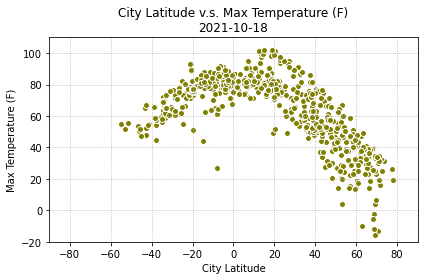

In [12]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_temp, marker = "o", color = "olive", edgecolor = "white")

plt.title(f"City Latitude v.s. Max Temperature (F)\n{date}")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-90, 90)
plt.ylim(-20, 110)
plt.grid(linestyle = ":")

plt.tight_layout()
plt.savefig("image/Lat_vs_Temp")
plt.show()

## Latitude vs. Humidity Plot

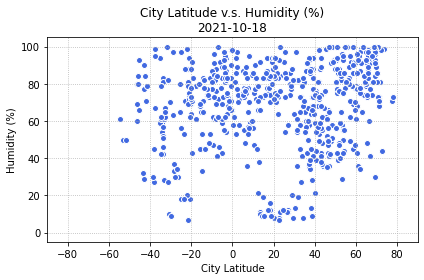

In [13]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_humid, marker = "o", color = "royalblue", edgecolor = "white")

plt.title(f"City Latitude v.s. Humidity (%)\n{date}")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid(linestyle = ":")

plt.tight_layout()
plt.savefig("image/Lat_vs_Humid")
plt.show()

## Latitude vs. Cloudiness Plot

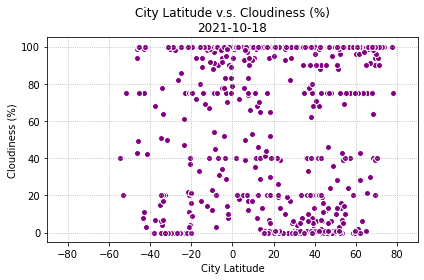

In [14]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_cloud, marker = "o", color = "purple", edgecolor = "white")

plt.title(f"City Latitude v.s. Cloudiness (%)\n{date}")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid(linestyle = ":")

plt.tight_layout()
plt.savefig("image/Lat_vs_Cloud")
plt.show()

## Latitude vs. Wind Speed Plot

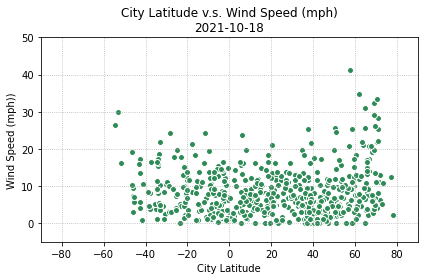

In [15]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_wind, marker = "o", color = "seagreen", edgecolor = "white")

plt.title(f"City Latitude v.s. Wind Speed (mph)\n{date}")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph))")
plt.xlim(-90, 90)
plt.ylim(-5, 50)
plt.grid(linestyle = ":")

plt.tight_layout()
plt.savefig("image/Lat_vs_Wind")
plt.show()

## Linear Regression

In [16]:
n_hemisphere_df = clean_city_df.loc[clean_city_df["Latitude"] >= 0]
s_hemisphere_df = clean_city_df.loc[clean_city_df["Latitude"] < 0]
s_hemisphere_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Punta Arenas,CL,-53.1500,-70.9167,51.91,50,20,29.93,2021-10-18
1,Busselton,AU,-33.6500,115.3333,58.77,83,64,8.25,2021-10-18
4,Mar del Plata,AR,-38.0023,-57.5575,57.99,27,0,8.01,2021-10-18
8,Rocha,UY,-34.4833,-54.3333,63.36,59,78,4.76,2021-10-18
9,Puerto Ayora,EC,-0.7393,-90.3518,67.55,98,100,7.00,2021-10-18


In [17]:
# set a function to create Linear Regression plots

def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue**2,2)

    plt.scatter(x, y, marker = "o", color = color, edgecolor = "white")
    plt.plot(x,regress_values,"r-")
    
    # add the linear regression equation and line
    plt.annotate(line_eq, position, fontsize = 15, color = "red", fontweight = "bold")
    plt.title(f"{title}\n{date}", fontweight = "bold")
    plt.xlabel("City Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    
    plt.show()
    plt.savefig(f"image/{figname}")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8459533631750339


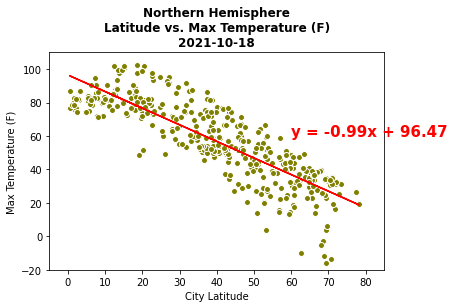

None


<Figure size 432x288 with 0 Axes>

In [18]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Max Temperature (F)"]
y_label = "Max Temperature (F)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "olive"
position = (60, 60)

plt.xlim(-5, 85)
plt.ylim(-20, 110)
figname = "linreg_N_Temp"

print(linregress_plot(x,y))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7037975602851579


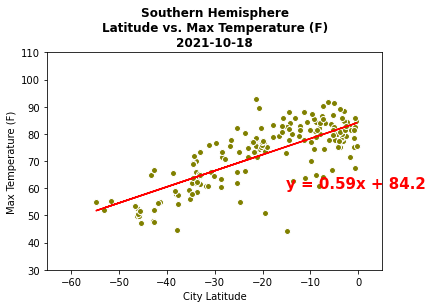

None


<Figure size 432x288 with 0 Axes>

In [19]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Max Temperature (F)"]
y_label = "Max Temperature (F)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "olive"
position = (-15, 60)

plt.xlim(-65, 5)
plt.ylim(30, 110)
figname = "linreg_S_Temp"

print(linregress_plot(x,y))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18701362435751942


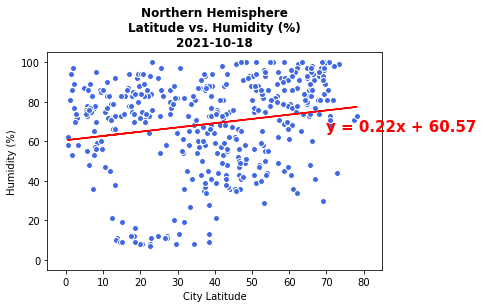

None


<Figure size 432x288 with 0 Axes>

In [20]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Humidity (%)"]
y_label = "Humidity (%)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "royalblue"
position = (70, 65)

plt.xlim(-5, 85)
plt.ylim(-5, 105)
figname = "linreg_N_Humid"

print(linregress_plot(x,y))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.25563892465673066


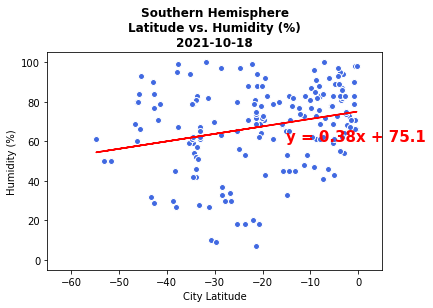

None


<Figure size 432x288 with 0 Axes>

In [21]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Humidity (%)"]
y_label = "Humidity (%)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "royalblue"
position = (-15, 60)

plt.xlim(-65, 5)
plt.ylim(-5, 105)
figname = "linreg_S_Humid"

print(linregress_plot(x,y))


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14978880508205406


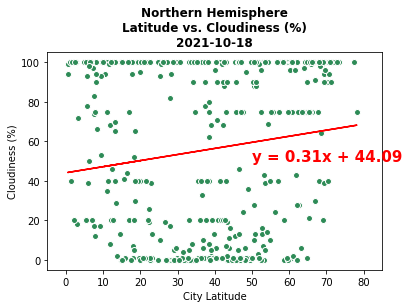

None


<Figure size 432x288 with 0 Axes>

In [22]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Cloudiness (%)"]
y_label = "Cloudiness (%)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "seagreen"
position = (50, 50)

plt.xlim(-5, 85)
plt.ylim(-5, 105)
figname = "linreg_N_Cloud"

print(linregress_plot(x,y))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.39828709164834136


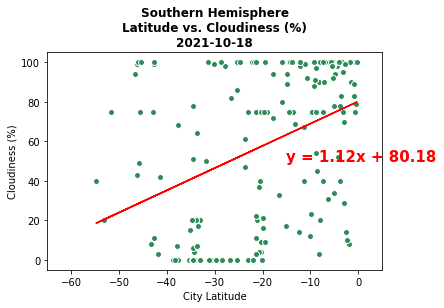

None


<Figure size 432x288 with 0 Axes>

In [23]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Cloudiness (%)"]
y_label = "Cloudiness (%)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "seagreen"
position = (-15, 50)

plt.xlim(-65, 5)
plt.ylim(-5, 105)
figname = "linreg_S_Cloud"

print(linregress_plot(x,y))


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.24057623605468578


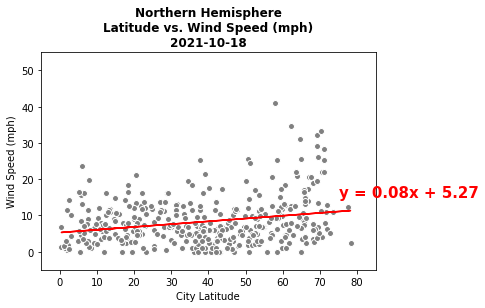

None


<Figure size 432x288 with 0 Axes>

In [24]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Wind Speed (mph)"]
y_label = "Wind Speed (mph)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "gray"
position = (75, 15)

plt.xlim(-5, 85)
plt.ylim(-5, 55)
figname = "linreg_N_Wind"

print(linregress_plot(x,y))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23672127015580996


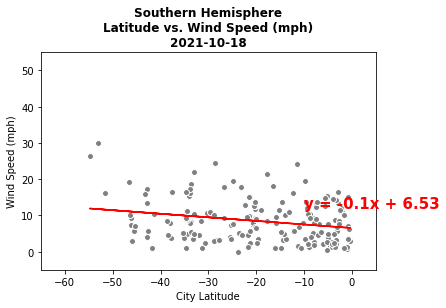

None


<Figure size 432x288 with 0 Axes>

In [25]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Wind Speed (mph)"]
y_label = "Wind Speed (mph)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "gray"
position = (-10, 12)

plt.xlim(-65, 5)
plt.ylim(-5, 55)
figname = "linreg_S_Wind"

print(linregress_plot(x,y))
